# Logistic Regression using Gradient Descent

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Creating synthetic datasets for testing

In [2]:
from sklearn.datasets import make_classification

ft = 5 # specify the number of features
X, y = make_classification(n_samples = 100, n_features=ft,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

In [3]:
dataset = pd.DataFrame(X, columns=[ 'Feature_'+str(i) for i in range(1,ft+1) ])
dataset['Label'] = y
dataset

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label
0,-0.085931,0.314279,0.875833,1.382734,0.194293,1
1,-0.249459,0.296258,0.493837,-0.789788,0.049495,1
2,-0.521189,0.349102,-0.477974,-1.779285,-1.843070,0
3,-0.581268,0.443079,-1.567768,0.869923,-1.632635,1
4,0.317218,0.546995,-0.466419,-1.638303,0.786328,0
...,...,...,...,...,...,...
95,0.349654,0.527512,-1.437791,1.096743,-0.764144,0
96,0.814520,0.370669,-0.185054,0.187662,0.058926,1
97,1.128594,0.452681,0.771406,2.719972,0.496001,1
98,-1.188945,1.859733,-1.183881,-0.295063,0.773253,0


### Sigmoid Function

In [4]:
def sig(x):
    return 1 / (1 + np.exp(-x))

<IPython.core.display.Javascript object>


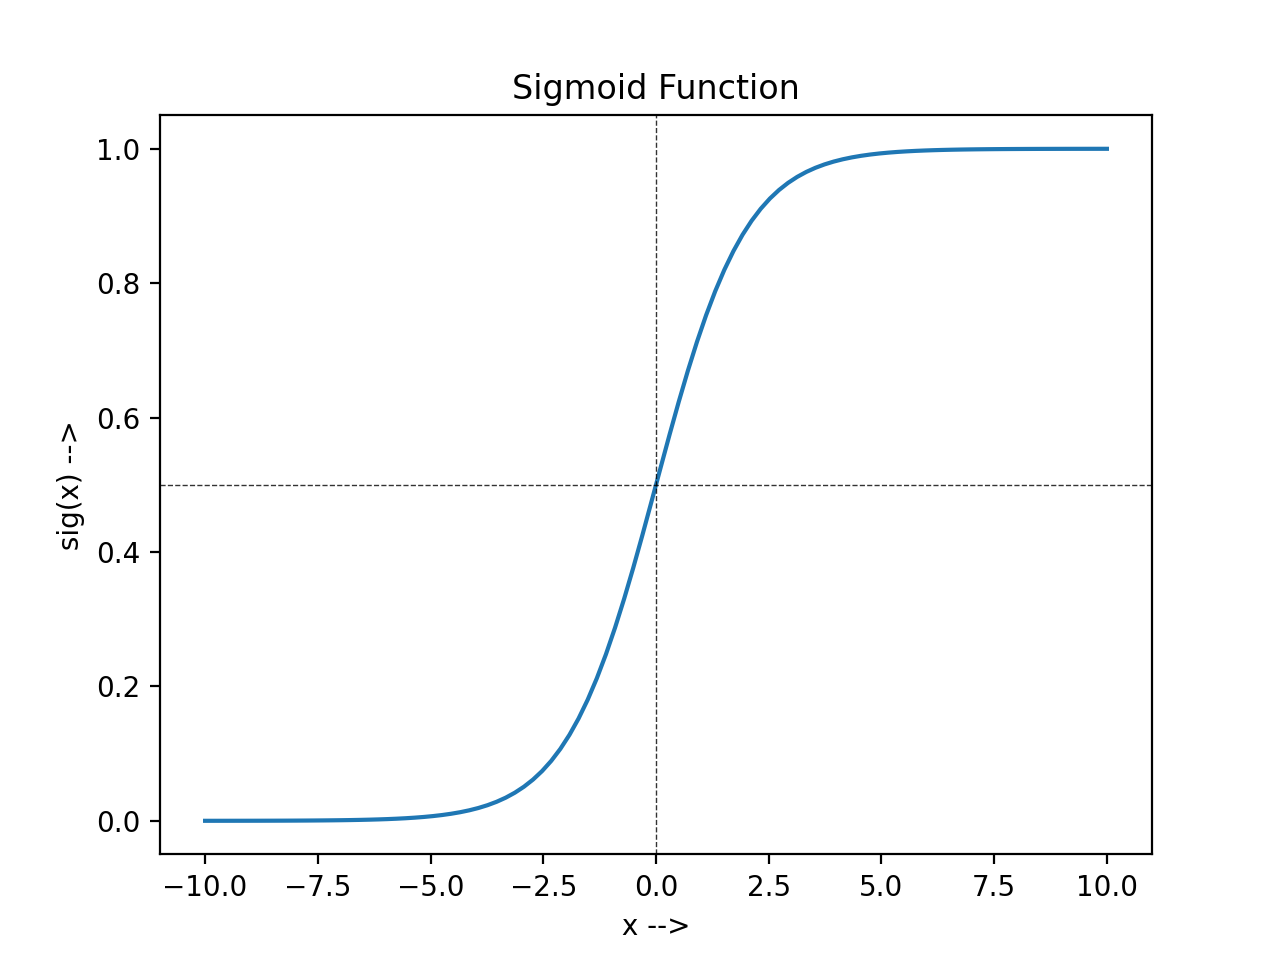

In [5]:
values = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(values, sig(values))
plt.axhline(y=0.5, color="black", linestyle='--', alpha=0.8, lw=0.5)
plt.axvline(color = 'black', linestyle ='--', alpha=0.8, lw=0.5)
plt.title('Sigmoid Function')
plt.ylabel(' sig(x) --> ')
plt.xlabel(' x --> ')
plt.show()

### Logarithmic Cost Function for logistic regression

L2 regularization penalty has been used here, Regularizations are used in order to prevent over-fitting. We try to penalize the model for fitting very well to the training set because the training set might contain noise, outliers, mis-labelled points, etc whose effect can be minimized by regularization.

In [6]:
def costl(x, y, th, l=1, loc=None):
    m = len(x)
    if loc != 'in':
        x = sig(np.hstack((np.array([1]*m).reshape(-1,1), x)))
        
    h = sig(x.dot(th)) # new hypothesis squished b/w 0 & 1 using sigmoid function
    
    c1 = (y.ravel()).dot(np.log(h)) # cost calculated when target is 1
    
    c2 = ((1-y).ravel()).dot(np.log(1-h)) # cost calculated when target is 0
    
    penalty = np.sum(th[1:]**2)/(2*m)*l # l2 regularization to prevent over-fitting
    return ((c1 + c2) / (-m))[0] + penalty

### Intercept and Coefficient calculating Function for logistic regression using Gradient Descent

x -> the training dataset, a 2D array.

y -> target values, 1D array.

a -> learning rate.

itr -> maximum number of iterations to be performed.

graph -> To check if the model has coverged or not.
         Set 1, to see the plot. 
         Set 0, to get the intercept and coefficients alone, without the plot.
         
l2 -> lambda term, specifies the degree of regularization

In [7]:
def gdl(x, y, a=0.1, itr=100,l2=1, graph=0):
    m, n = x.shape
    # m -> no of datapoints
    # n -> no of features
    
    th = np.array([0]*(n+1)).reshape(-1,1)
    # th -> set intercept and coefficient values to 0 initially
    
    x = np.hstack((np.ones((m,1)), x))
    # add a row of 1s to the dataset to mulitply with the intercept term in th
    
    y = y.reshape(-1,1)
    cst = [costl(x, y, th, l=l2, loc='in')]
    # list to store the cost to check for convergence
    
    pen = np.array([0] + [(a*l2/m)]*n).reshape(-1,1)
    # penalty term need not penalize the intercept term
    
    for i in range(itr):
        der = (x.T).dot(sig(x.dot(th)) - y) / m
        # gradient of the cost function
        
        th = (th-(pen*th)) - (a * der) #updated th
        cst.append(costl(x, y, th, l=l2, loc='in')) #cost for updated th
    if graph == 1:
        plt.figure()
        plt.plot(cst) #plot the cost wrt iterations
        plt.title('Convergence curve for alpha = {} and max_iteration = {}'.format(a, itr))
        plt.ylabel('Cost function')
        plt.xlabel('Iteration')
        plt.show()
    return th

### A non-converging model for high learning rate(a)

<IPython.core.display.Javascript object>


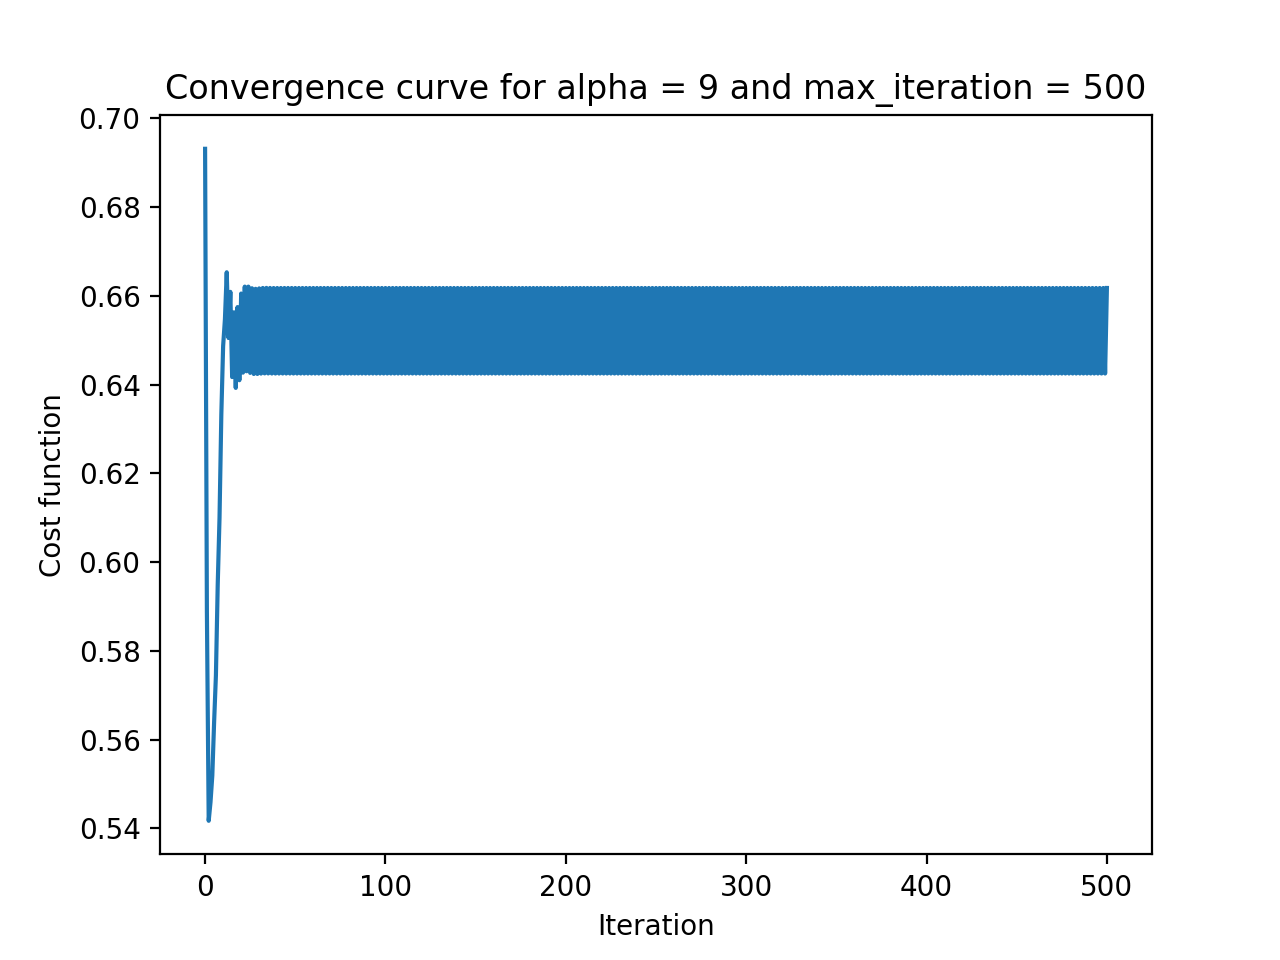

In [8]:
out = gdl(X, y, a=9, itr=500, graph=1)

In [9]:
print('Intercept: ', out[0,0])
print('Coefficients: ', out[1:].ravel()) # bad parameters estimated

Intercept:  0.5111963758989545
Coefficients:  [ 0.21483526  2.21233954  0.61532714  1.10374835 -0.50485708]


### Model takes more number of iterations to converge when learning rate (a) is very small

<IPython.core.display.Javascript object>


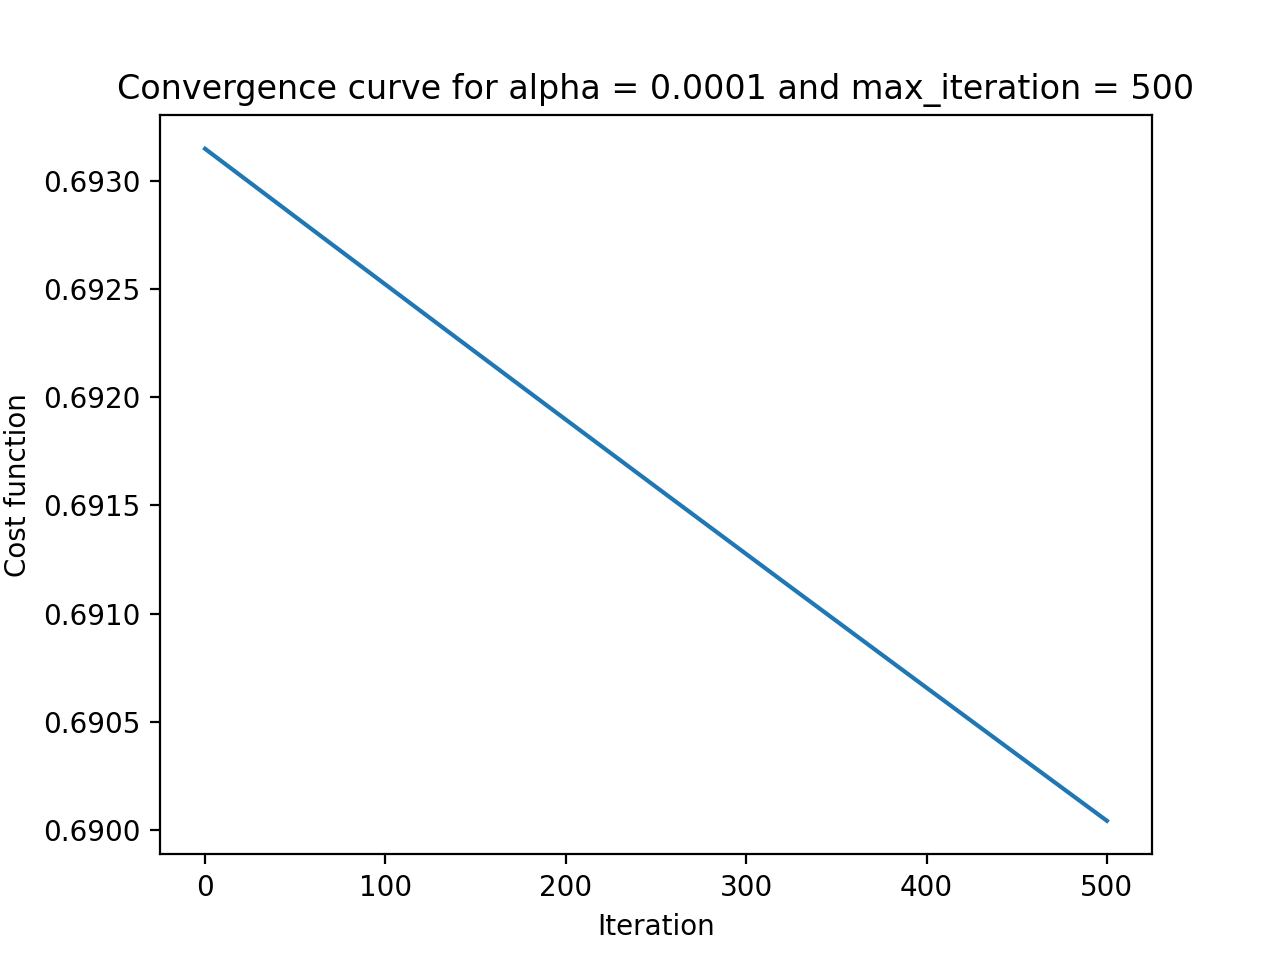

In [10]:
out = gdl(X, y, a=0.0001, itr=500, graph=1)

In [11]:
print('Intercept: ', out[0,0])
print('Coefficients: ', out[1:].ravel()) # bad parameters estimated

Intercept:  0.0014928887994285088
Coefficients:  [ 0.00216851  0.01077781  0.00430747 -0.00201946 -0.00308559]


### A perfectly converging model for appropriate learning rate(a)

<IPython.core.display.Javascript object>


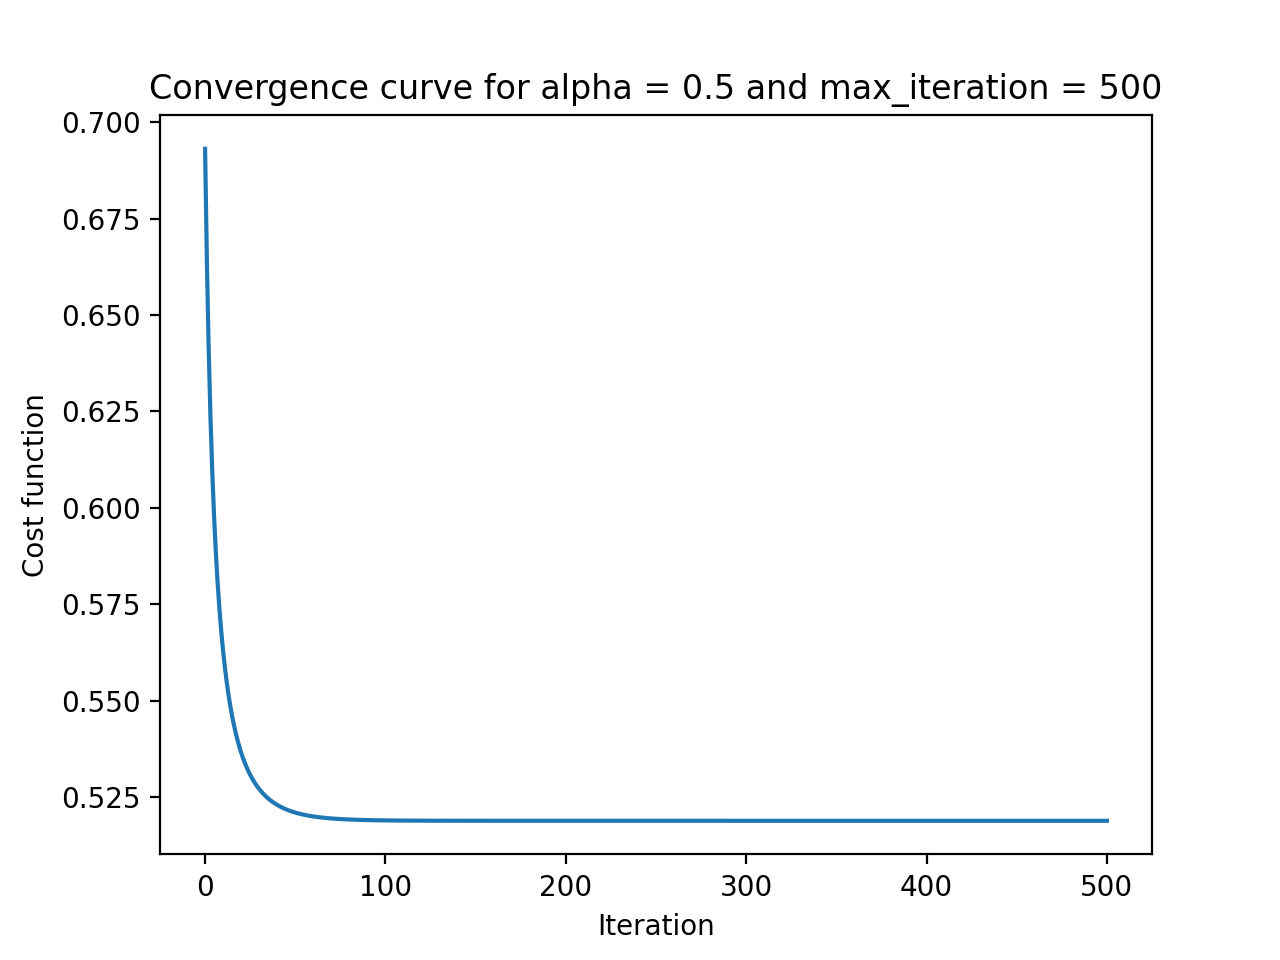

In [12]:
out = gdl(X, y, a=0.5, itr=500, graph=1)

In [13]:
print('Intercept: ', out[0,0])
print('Coefficients: ', out[1:].ravel()) # bad parameters estimated

Intercept:  -0.07783446382963999
Coefficients:  [ 0.21174566  1.71415372  0.50465778  0.25084186 -0.09230675]


### Verifying Results with Scikit-learn

In [14]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='l2', C=1).fit(X, y) # Note: C = 1/lambda
print('Intercept: ', lor.intercept_[0])
print('Coefficients: ', lor.coef_[0])

Intercept:  -0.0778425578731892
Coefficients:  [ 0.21174138  1.71413778  0.50465111  0.25084472 -0.09230804]
